In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [23]:
df = pd.read_csv('marketing_campaign.csv', sep="\t")

In [4]:
df.head()

,customer,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer             2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### There are missing values in the income column. There aren't many so I will drop them a little further down. ###

In [6]:
df.shape

(2240, 29)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [24]:
# Dropping columns that don't give us much info

df.drop(['customer', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [25]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,0,0,0,0,0,0


In [26]:
df.dropna(subset=['Income'], inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2216 non-null   int64  
 1   Education            2216 non-null   object 
 2   Marital_Status       2216 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2216 non-null   int64  
 5   Teenhome             2216 non-null   int64  
 6   Dt_Customer          2216 non-null   object 
 7   Recency              2216 non-null   int64  
 8   MntWines             2216 non-null   int64  
 9   MntFruits            2216 non-null   int64  
 10  MntMeatProducts      2216 non-null   int64  
 11  MntFishProducts      2216 non-null   int64  
 12  MntSweetProducts     2216 non-null   int64  
 13  MntGoldProds         2216 non-null   int64  
 14  NumDealsPurchases    2216 non-null   int64  
 15  NumWebPurchases      2216 non-null   i

<AxesSubplot:xlabel='Education', ylabel='count'>

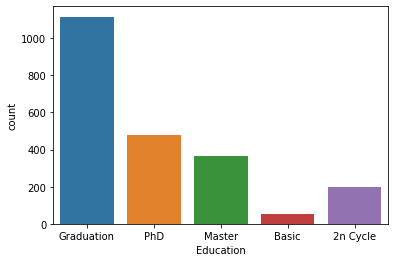

In [12]:
sns.countplot(x='Education', data=df)

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

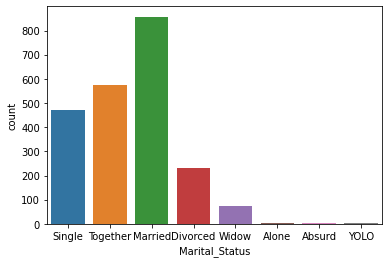

In [13]:
sns.countplot(x='Marital_Status', data=df)

### There are some useless responses that we can remove such as 'Absurd' and 'YOLO'. We can change the 'Alone' responses to Single. ###

In [28]:
# Long winded way of checking for number of 'Alone' responses instead of using value_counts function

needs_changing = ['Alone']

df['Marital_Status'].isin(needs_changing).sum()

3

### Only 3 responses contain 'Alone' for marital status. ###

In [29]:
# Replacing Alone with Single

df['Marital_Status'].replace('Alone', 'Single', inplace=True)

In [30]:
# Checking to see that it worked

df['Marital_Status'].isin(needs_changing).sum()

0

In [31]:
# Just curious to see the full records of the crazy marital status responses

df.loc[((df['Marital_Status'] == 'YOLO') | (df['Marital_Status'] == 'Absurd'))]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2093,1993,Graduation,Absurd,79244.0,0,0,19-12-2012,58,471,102,...,10,7,1,0,0,1,1,0,0,1
2134,1957,Master,Absurd,65487.0,0,0,10-01-2014,48,240,67,...,5,6,2,0,0,0,0,0,0,0
2177,1973,PhD,YOLO,48432.0,0,1,18-10-2012,3,322,3,...,1,6,8,0,0,0,0,0,0,0
2202,1973,PhD,YOLO,48432.0,0,1,18-10-2012,3,322,3,...,1,6,8,0,0,0,0,0,0,1


### Two entries appear to be duplicates. It'll be worth checking to see how frequent of an issue that is and removing them. ###

In [32]:
redic_index = df.loc[((df['Marital_Status'] == 'YOLO') | (df['Marital_Status'] == 'Absurd'))].index

In [33]:
redic_index

Int64Index([2093, 2134, 2177, 2202], dtype='int64')

In [34]:
# Removing the rediculous entries

df.drop(index=redic_index, inplace=True)

<AxesSubplot:xlabel='Year_Birth', ylabel='Count'>

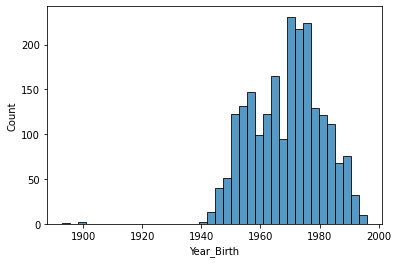

In [21]:
sns.histplot(df, x='Year_Birth')

In [35]:
# While we're here let's go ahead and change Year_Birth to an actual age

df['Age'] = 2022 - df['Year_Birth']

In [37]:
df['Age'].head()

0    65
1    68
2    57
3    38
4    41
Name: Age, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

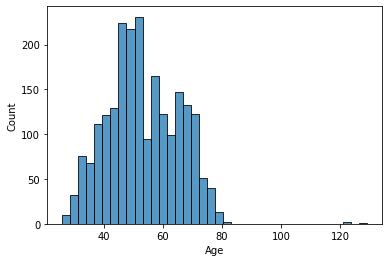

In [38]:
sns.histplot(df, x='Age')

### Not relevant to anything but interesting to see how the conversion flips the distribution in the histogram. ###

In [45]:
# Let's see who the age outliers are

df.sort_values(by='Age', ascending=False)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
239,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,...,2,4,0,0,0,0,0,0,0,129
339,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,...,4,1,0,0,1,0,0,0,0,123
192,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,6,...,2,5,0,0,0,0,0,1,0,122
1950,1940,PhD,Single,51141.0,0,0,08-07-2013,96,144,0,...,4,5,0,0,0,0,0,0,0,82
424,1941,PhD,Married,93027.0,0,0,13-04-2013,77,1285,42,...,5,2,0,0,1,0,0,0,0,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1850,1995,2n Cycle,Single,83257.0,0,0,18-09-2012,56,536,27,...,12,6,1,0,1,0,0,1,1,27
995,1995,Graduation,Single,34824.0,0,0,26-03-2014,65,4,2,...,2,6,0,0,0,0,0,0,0,27
2213,1995,2n Cycle,Single,80617.0,0,0,12-10-2012,42,594,51,...,8,2,0,0,0,0,0,0,0,27
46,1996,2n Cycle,Married,7500.0,0,0,09-11-2012,24,3,18,...,3,9,0,0,0,0,0,0,1,26


In [44]:
redic_ages = df.loc[df['Age'] > 100].index

redic_ages

Int64Index([192, 239, 339], dtype='int64')

In [46]:
# Dropping these records

df.drop(index=redic_ages, inplace=True)

In [48]:
df.shape

(2209, 27)

In [50]:
# Let's remove the duplicate records mentioned earlier

df.drop_duplicates()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,4,7,0,0,0,0,0,0,1,65
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,2,5,0,0,0,0,0,0,0,68
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,10,4,0,0,0,0,0,0,0,57
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,4,6,0,0,0,0,0,0,0,38
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,6,5,0,0,0,0,0,0,0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,...,3,6,0,0,0,0,0,0,0,45
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,4,5,0,0,0,0,0,0,0,55
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,13,6,0,1,0,0,0,0,0,41
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,10,3,0,0,0,0,0,0,0,66
